In [1]:
from matplotlib import pyplot as plt
import numpy as np
import dill
import matplotlib as mpl
plt.style.use("/home/kjeong/.config/matplotlib/custom.mplstyle")
plt.rcParams["text.latex.preamble"] = r'\usepackage{siunitx}\sisetup{detect-all}\usepackage{cmbright}'#\usepackage{sansmath}\sansmath
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams["font.sans-serif"] = 'cmbright'

workdir = "/project/dinner/kjeong/insulin/pipeline/step7_5ns"
ntraj = 28*28*24
length = 1000

rn_ls = [0, 1, 2]
lag_ls = [100, 200, 400, 600, 800, 900] 
mem_ls = [0, 1, 4, 9]

In [2]:
k_ls = [100, 200, 400, 600]

with open(f"{workdir}/step3_lag_mem/output/qf_unq_mem.pkl", "rb") as f:
    qf_unq = dill.load(f)

In [3]:
lag_choice = [0, 1, 2, 3, 4]
mem_choice = [0, 1, 2]

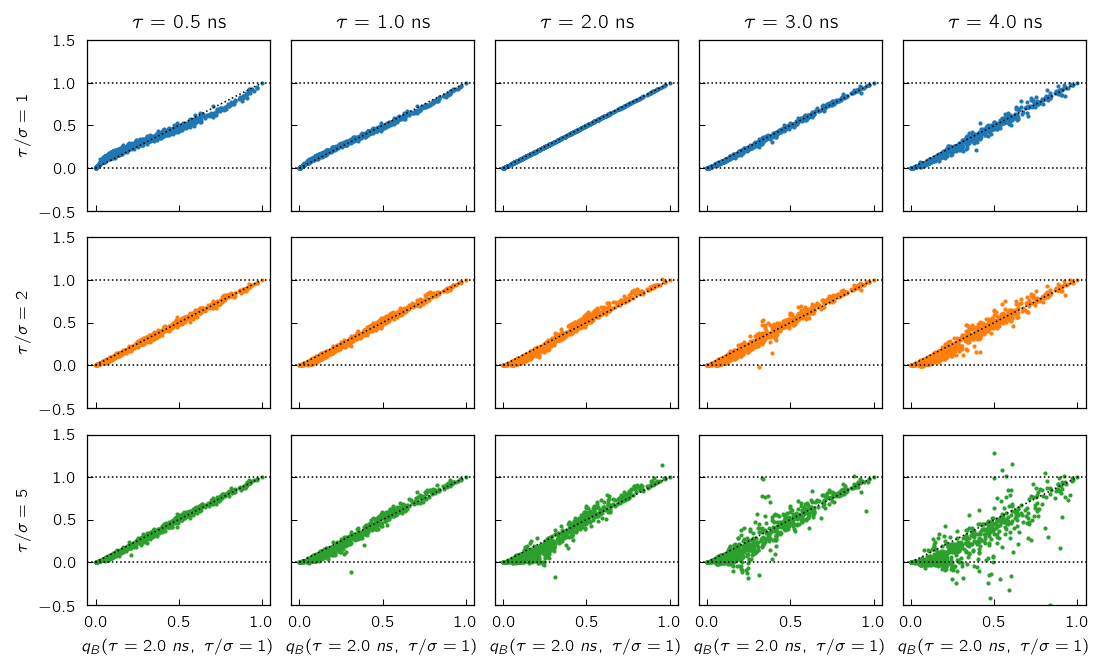

In [9]:
#k_id[0-3]; rn_id[0-2]; lag_id[0-5]; mem_id[0-3]
i_k=3; i_rn=0
k = k_ls[i_k]
# OG committor sensitivity along memory and lag time
qf_arr = qf_unq[i_k][i_rn]
ncol = len(lag_choice)
nrow = len(mem_choice)
fig_width = 7.25
fig_height = nrow*fig_width/ncol
fig, axs = plt.subplots(nrow, ncol, figsize=(fig_width, fig_height), sharex=True, sharey=True, constrained_layout=True)
for i_l, lag in enumerate(np.array(lag_ls)[lag_choice]):
    for i_m, mem in enumerate(np.array(mem_ls)[mem_choice]):
        axs[i_m, i_l].plot(qf_arr[2, 0], qf_arr[i_l,i_m], '.', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i_m])
        axs[i_m, i_l].plot(np.linspace(0, 1.0, 11), np.linspace(0, 1.0, 11), ':k')
        axs[i_m, i_l].axhline(1.0, color='k', linestyle = ':')
        axs[i_m, i_l].axhline(0.0, color='k', linestyle = ':')
        axs[0 , i_l].set_title(f"$\\tau=\ ${lag*0.005:.1f} ns")
        if i_l == 0:
            axs[i_m, i_l].set_ylabel(f"$\\tau/\sigma=$ {mem+1}")# \n$q_+$ ($\\tau=$ {lag*0.005:.1f} ns, $\\tau/\sigma=$ {mem+1})")
        #else:
        axs[-1, i_l].set_xlabel(f"$q_B$($\\tau=2.0\ ns,\ \\tau/\sigma=1$)")
        axs[-1, i_l].set_xlim([-0.05, 1.05])
        axs[-1, i_l].set_ylim([-0.5, 1.5])
#plt.savefig(f"{workdir}/figure/step3_lag_mem_cm.pdf")

In [16]:
k_ls = [1000, 1500, 2000, 3000]
mem_ls = [0, 1, 4]
with open(f"{workdir}/step3_lag_mem/output/qf_unq_mem_hk.pkl", "rb") as f:
    qf_unq = dill.load(f)

Text(0.5, 0.98, 'k=2000')

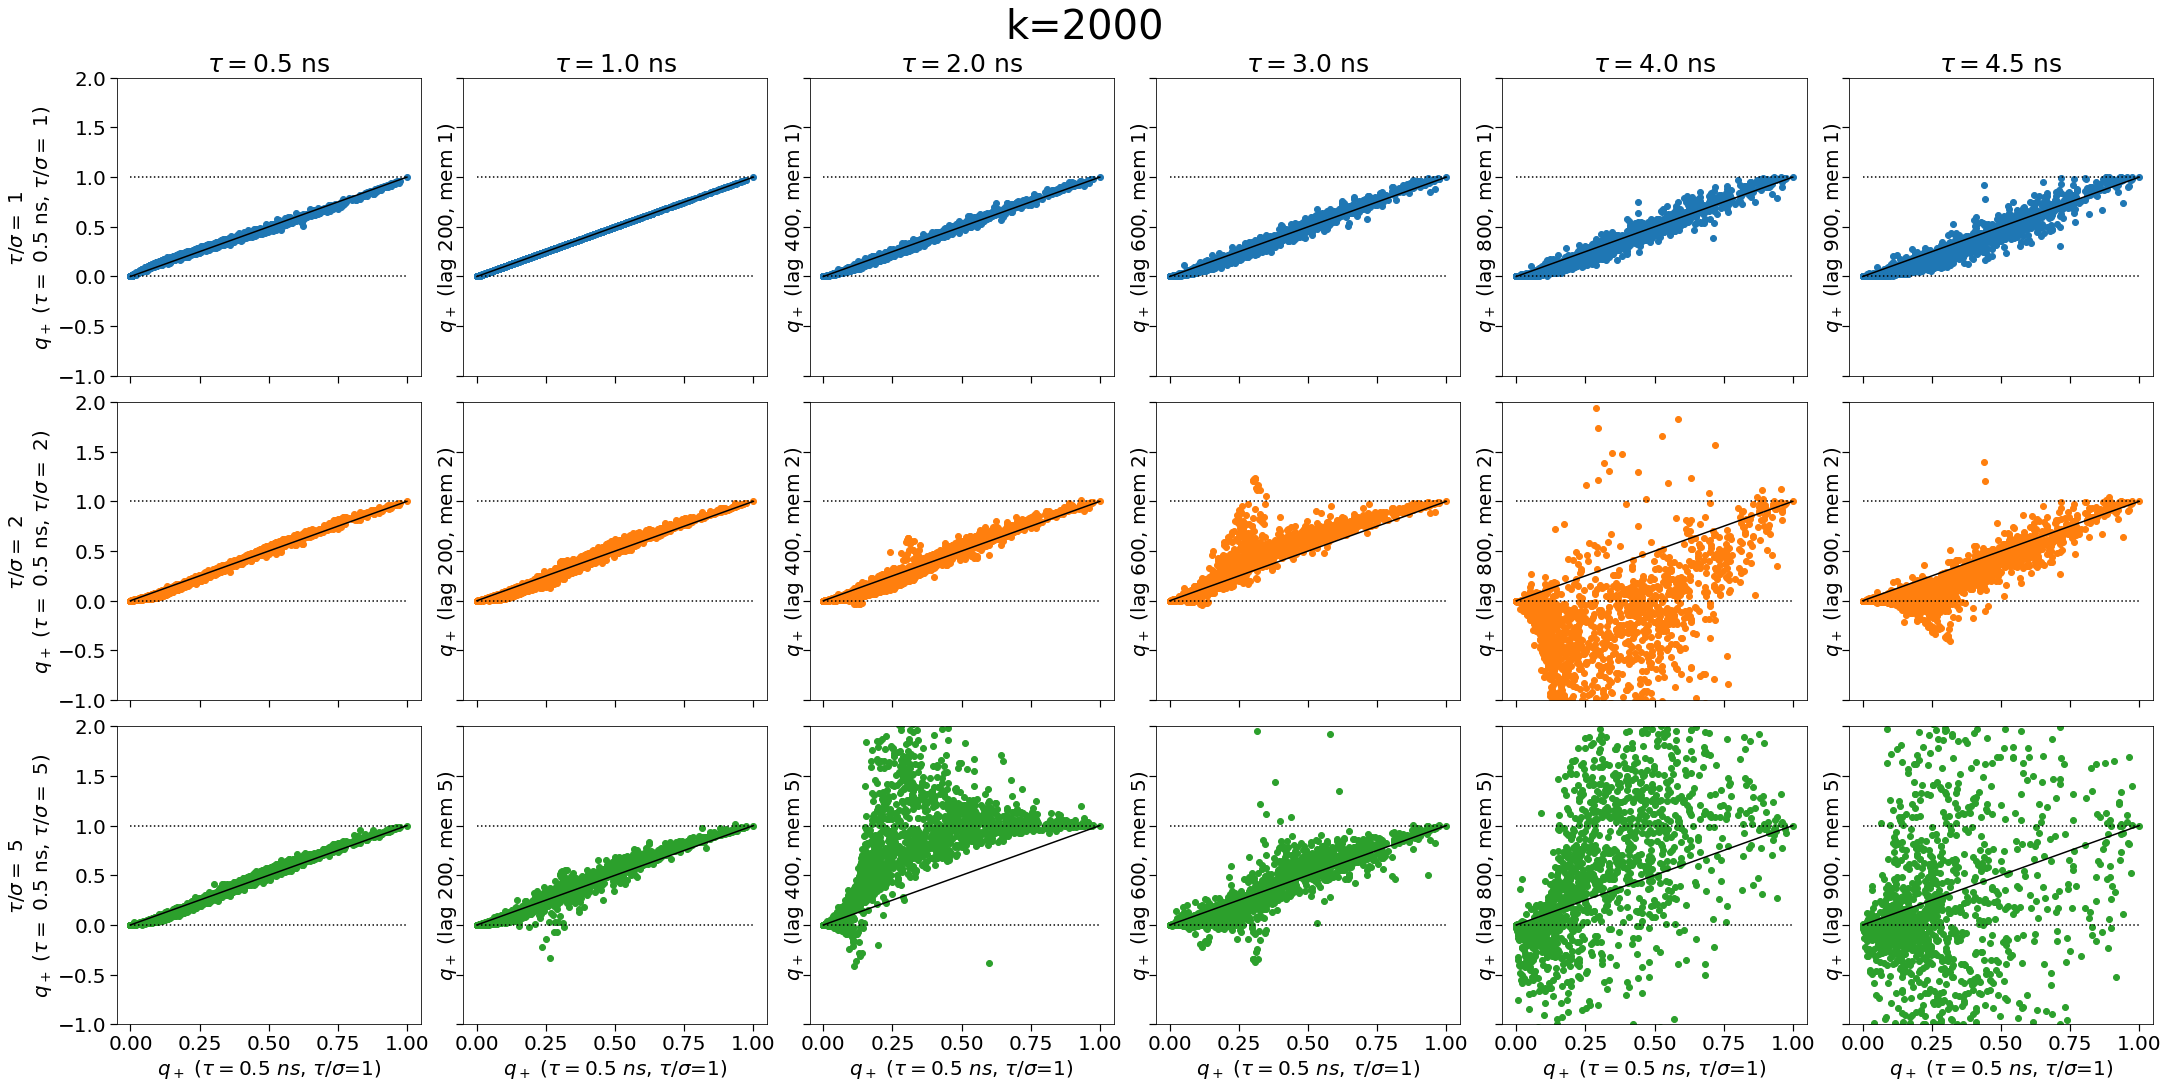

In [14]:
#k_id[0-3]; rn_id[0-2]; lag_id[0-5]; mem_id[0-3]
i_k=2; i_rn=0
k = k_ls[i_k]

# OG committor sensitivity along memory and lag time
#qf_arr = qf_dic["OG"]
qf_arr = qf_unq[i_k][i_rn]
#i_randomseed = 0
#pj_str = "proj"
#ref_str = "proj_lag100_mem0_randomseed0"
#qf_ref = np.vstack(qf_arr[ref_str])
#qf_ref_uq, qf_ref_id = np.unique(qf_ref, return_index=True)
ncol = len(lag_choice)
nrow = len(mem_choice)
fig, axs = plt.subplots(nrow, ncol, figsize=(5*ncol, 5*nrow), sharex=True, sharey=True, constrained_layout=True)
for i_l, lag in enumerate(np.array(lag_ls)[lag_choice]):
    for i_m, mem in enumerate(np.array(mem_ls)[mem_choice]):
        #q_test = np.ravel(qf_arr[f"{pj_str}_lag{lag}_mem{mem}_randomseed{i_randomseed}"])[qf_ref_id]
        axs[i_m, i_l].plot(qf_arr[1, 0], qf_arr[i_l,i_m], 'o', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i_m])
        axs[i_m, i_l].plot(np.linspace(0, 1.0, 11), np.linspace(0, 1.0, 11), 'k')
        axs[i_m, i_l].plot(np.linspace(0, 1.0, 11), np.ones(11), ':k')
        axs[i_m, i_l].plot(np.linspace(0, 1.0, 11), np.zeros(11), ':k')
        axs[0 , i_l].set_title(f"$\\tau= ${lag*0.005:.1f} ns")
        if i_l == 0:
            axs[i_m, i_l].set_ylabel(f"$\\tau/\sigma=$ {mem+1} \n$q_+$ ($\\tau=$ {lag*0.005:.1f} ns, $\\tau/\sigma=$ {mem+1})")
        else:
            axs[i_m, i_l].set_ylabel(f"$q_+$ (lag {lag}, mem {mem+1})")
        axs[-1, i_l].set_xlabel(f"$q_+$ ($\\tau=0.5\ ns$, $\\tau/\sigma$=1)")
        axs[-1, i_l].set_xlim([-0.05, 1.05])
        axs[-1, i_l].set_ylim([-1, 2])
plt.suptitle(f"k={k}", fontsize=40)